# Przetwarzanie danych

Cel - przygotować Dataset w formie w której by się nadawał do treningu LSTMa

In [120]:
from typing import Any
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
seqs = pd.read_csv('../data/raw/training_set.csv')
meta = pd.read_csv('../data/raw/training_set_metadata.csv')

In [3]:
seqs

,object_id,mjd,passband,flux,flux_err,detected
0,615,59750.4229,2,-544.810303,3.622952,1
1,615,59750.4306,1,-816.434326,5.553370,1
2,615,59750.4383,3,-471.385529,3.801213,1
3,615,59750.4450,4,-388.984985,11.395031,1
4,615,59752.4070,2,-681.858887,4.041204,1
...,...,...,...,...,...,...
1421700,130779836,60555.9838,4,-39.881969,46.477093,0
1421701,130779836,60560.0459,1,14.894439,18.947685,0
1421702,130779836,60571.0225,5,30.593130,50.695290,0
1421703,130779836,60585.9974,4,-23.471439,44.819859,0


In [4]:
seqs.describe()

,object_id,mjd,passband,flux,flux_err,detected
count,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06,1.421705e+06
mean,3.392608e+07,6.017921e+04,2.783108e+00,2.468855e+01,2.548932e+01,1.666168e-01
std,4.258439e+07,3.092379e+02,1.703946e+00,3.684506e+03,3.814492e+03,3.726336e-01
min,6.150000e+02,5.958003e+04,0.000000e+00,-1.149388e+06,4.637530e-01,0.000000e+00
25%,1.843400e+05,5.989905e+04,1.000000e+00,-2.789418e+00,2.118670e+00,0.000000e+00
50%,4.548783e+06,6.019331e+04,3.000000e+00,7.331990e-01,4.708105e+00,0.000000e+00
75%,6.796280e+07,6.048722e+04,4.000000e+00,8.830932e+00,1.297371e+01,0.000000e+00
max,1.307798e+08,6.067436e+04,5.000000e+00,2.432809e+06,2.234069e+06,1.000000e+00


In [24]:
meta

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90
...,...,...,...,...,...,...,...,...,...,...,...,...
7843,130739978,26.718750,-14.940303,172.342697,-72.255675,0,0.0000,0.0000,0.0000,NaN,0.013,65
7844,130755807,120.101349,-62.696659,275.742955,-16.509746,0,0.1725,2.5606,1.1146,46.6108,0.136,90
7845,130762946,203.108109,-55.682144,308.728904,6.727511,0,0.0000,0.0000,0.0000,NaN,0.430,16
7846,130772921,79.101562,-35.501846,239.172243,-33.827844,0,0.0000,0.0000,0.0000,NaN,0.034,65


In [25]:
meta.describe()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
count,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,5523.000000,7848.000000,7848.000000
mean,4.810375e+07,169.719379,-27.254846,230.466784,-20.115526,0.269623,0.254436,0.357885,0.155695,41.263961,0.081953,60.895387
std,4.347364e+07,114.212761,20.248556,97.416392,40.390899,0.443792,0.330053,0.545552,0.300367,2.262711,0.150598,28.767984
min,6.150000e+02,0.175781,-64.760857,0.107681,-89.615573,0.000000,0.000000,0.000000,0.000000,31.996100,0.003000,6.000000
25%,3.180865e+05,62.402344,-44.597992,207.248509,-54.509752,0.000000,0.000000,0.000000,0.000000,39.845250,0.018000,42.000000
50%,4.131719e+07,150.996094,-27.279613,244.127187,-30.217582,0.000000,0.182750,0.210300,0.018000,41.167900,0.032000,65.000000
75%,8.665901e+07,282.875976,-8.838267,313.224277,16.913859,1.000000,0.350125,0.431200,0.122375,42.398550,0.076000,90.000000
max,1.307798e+08,359.824219,4.181528,359.943827,65.931317,1.000000,3.445100,2.999400,1.734800,47.025600,2.747000,95.000000


## ID obiektów

In [5]:
seqs["object_id"].nunique()

7848

In [11]:
object_ids = seqs["object_id"].unique()
object_ids.sort()
object_ids

array([      615,       713,       730, ..., 130762946, 130772921,
       130779836], shape=(7848,))

In [26]:
meta["object_id"].nunique()

7848

## Passband

In [123]:
seqs["passband"].value_counts()

passband
5    299025
4    277119
2    238049
3    233520
0    197493
1    176499
Name: count, dtype: int64

## Detected

In [60]:
seqs["detected"].value_counts()

detected
0    1184825
1     236880
Name: count, dtype: int64

## Pojedyncza sekwencja
Dla jednego obiektu i jednego pasma

Generalnie dla każdego obiektu będzie 6 sekwencji (po 1 na pasmo

In [21]:
seq_1 = seqs[(seqs["object_id"] == object_ids[0]) & (seqs["passband"] == 1)].copy()
seq_1.sort_values(by="mjd", inplace=True)
seq_1

,object_id,mjd,passband,flux,flux_err,detected
1,615,59750.4306,1,-816.434326,5.553370,1
5,615,59752.4147,1,-1061.457031,6.472994,1
10,615,59767.3045,1,-815.188599,5.293019,1
15,615,59770.2256,1,-820.042786,5.875329,1
20,615,59779.3265,1,-921.002502,6.306800,1
25,615,59782.1974,1,-449.095612,4.028310,1
30,615,59797.2938,1,35.511822,3.163646,1
35,615,59800.3244,1,129.541901,4.358776,1
40,615,59807.1815,1,-420.796417,4.037735,1
45,615,59810.1122,1,-527.020325,4.204173,1


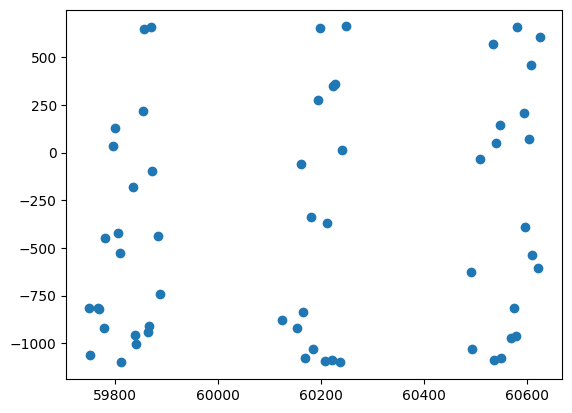

In [22]:
plt.scatter(x=seq_1["mjd"], y=seq_1["flux"])

## Przetwarzanie

### Wczytanie danych

In [124]:
metadata = pd.read_csv('../data/raw/training_set_metadata.csv')
sequences = pd.read_csv('../data/raw/training_set.csv')

labels = metadata[["object_id","target"]].set_index("object_id")

metadata = metadata.drop(columns=["target"])
metadata = metadata.set_index("object_id")

In [125]:
def get_sequence(sequences_df: pd.DataFrame, object_id: int, passband: int) -> np.ndarray:
    seq = sequences_df[(sequences_df["object_id"] == object_id) & (sequences_df["passband"] == passband)].copy()
    seq.sort_values(by="mjd", inplace=True)
    seq = seq[["mjd", "flux", "flux_err", "detected"]]
    return seq.values

def get_single_item(metadata_df: pd.DataFrame, sequences_df: pd.DataFrame, labels_df: pd.DataFrame, object_id: int) -> dict[str, Any]:
    return {
        "label": labels_df.loc[object_id].iloc[0],
        "metadata": metadata_df.loc[object_id].values,
        "sequences": {
            0: get_sequence(sequences_df, object_id, 0),
            1: get_sequence(sequences_df, object_id, 1),
            2: get_sequence(sequences_df, object_id, 2),
            3: get_sequence(sequences_df, object_id, 3),
            4: get_sequence(sequences_df, object_id, 4),
            5: get_sequence(sequences_df, object_id, 5),
        }
    }



In [126]:
item = get_single_item(metadata, sequences, labels, 615)
item["metadata"]

array([ 3.49046051e+02, -6.19438360e+01,  3.20796530e+02, -5.17537060e+01,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                   nan,  1.70000000e-02])

In [127]:
item["sequences"][1]

array([[ 5.97504306e+04, -8.16434326e+02,  5.55337000e+00,
         1.00000000e+00],
       [ 5.97524147e+04, -1.06145703e+03,  6.47299400e+00,
         1.00000000e+00],
       [ 5.97673045e+04, -8.15188599e+02,  5.29301900e+00,
         1.00000000e+00],
       [ 5.97702256e+04, -8.20042786e+02,  5.87532900e+00,
         1.00000000e+00],
       [ 5.97793265e+04, -9.21002502e+02,  6.30680000e+00,
         1.00000000e+00],
       [ 5.97821974e+04, -4.49095612e+02,  4.02831000e+00,
         1.00000000e+00],
       [ 5.97972938e+04,  3.55118220e+01,  3.16364600e+00,
         1.00000000e+00],
       [ 5.98003244e+04,  1.29541901e+02,  4.35877600e+00,
         1.00000000e+00],
       [ 5.98071815e+04, -4.20796417e+02,  4.03773500e+00,
         1.00000000e+00],
       [ 5.98101122e+04, -5.27020325e+02,  4.20417300e+00,
         1.00000000e+00],
       [ 5.98131122e+04, -1.10044006e+03,  6.70910600e+00,
         1.00000000e+00],
       [ 5.98350678e+04, -1.78149399e+02,  3.80985800e+00,
      

In [128]:
type(item["sequences"][1])

numpy.ndarray

In [129]:
item["label"]

np.int64(92)

In [130]:
object_ids

array([      615,       713,       730, ..., 130762946, 130772921,
       130779836], shape=(7848,))

In [131]:
dataset = [get_single_item(metadata, sequences, labels, obj_id) for obj_id in object_ids]

In [132]:
with open('../data/processed/training_set.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [133]:
with open('../data/processed/training_set.pkl', 'rb') as f:
    loaded_dataset = pickle.load(f)

loaded_dataset[0]

{'label': np.int64(92),
 'metadata': array([ 3.49046051e+02, -6.19438360e+01,  3.20796530e+02, -5.17537060e+01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                    nan,  1.70000000e-02]),
 'sequences': {0: array([[ 5.98191532e+04,  6.87878400e+00,  3.63315200e+00,
           0.00000000e+00],
         [ 5.98201047e+04,  3.93648530e+01,  3.77561900e+00,
           1.00000000e+00],
         [ 5.98211026e+04, -1.04223810e+01,  4.17268300e+00,
           0.00000000e+00],
         [ 5.98221105e+04, -6.54851300e+01,  4.36287600e+00,
           1.00000000e+00],
         [ 5.98231505e+04, -1.13349159e+02,  4.06905100e+00,
           1.00000000e+00],
         [ 5.98511114e+04, -6.85024570e+01,  3.33855500e+00,
           1.00000000e+00],
         [ 5.98740599e+04, -9.73531950e+01,  3.13399000e+00,
           1.00000000e+00],
         [ 5.98750311e+04, -9.75238800e+01,  2.96307500e+00,
           1.00000000e+00],
         [ 5.98760231e+04, -1.08672577e+